**In the name of God**



*   Name: Mohammad 
*   LastName: Maftoun

*Github:https://github.com/MohammadMaftoun *

In [ ]:
#for better visualization,this library can help us.
!pip install autoviz

In [203]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


In [204]:

MyDataSet = pd.read_csv('diabetes.csv')

MyDataSet.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Shape of your Data Set loaded: (768, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


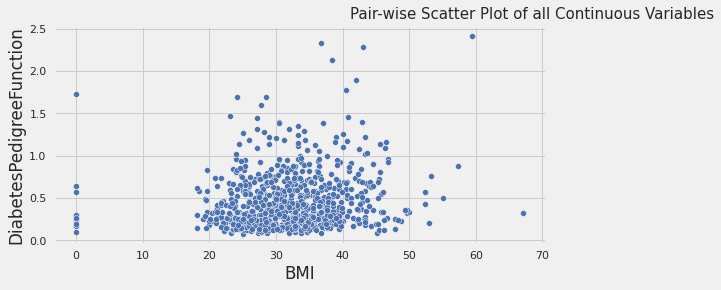

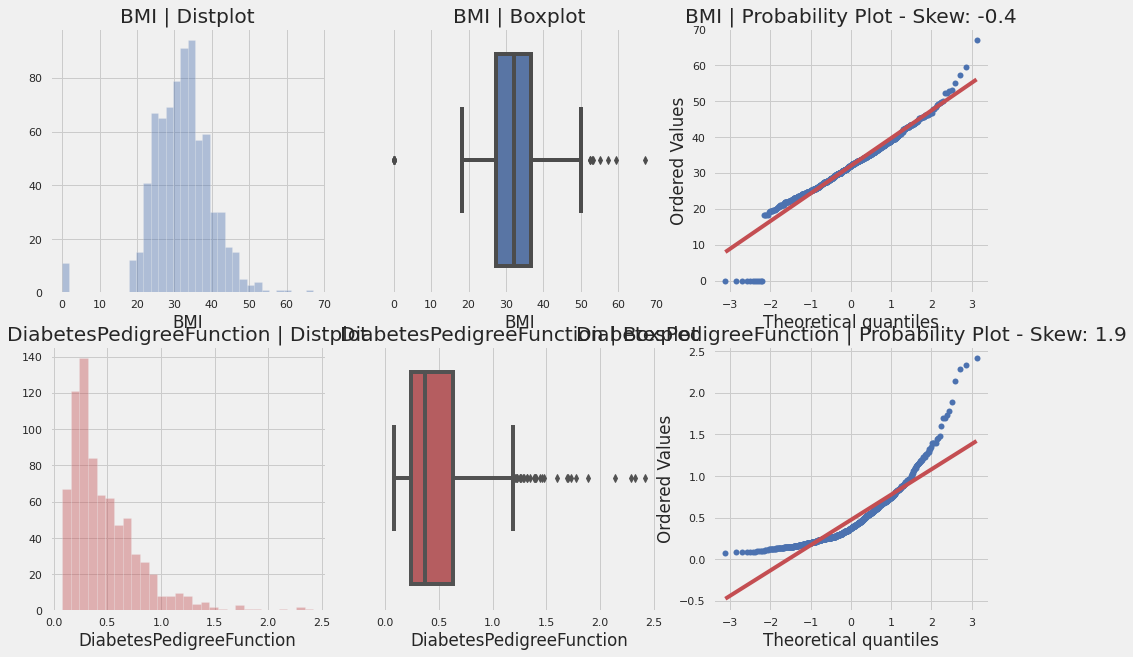

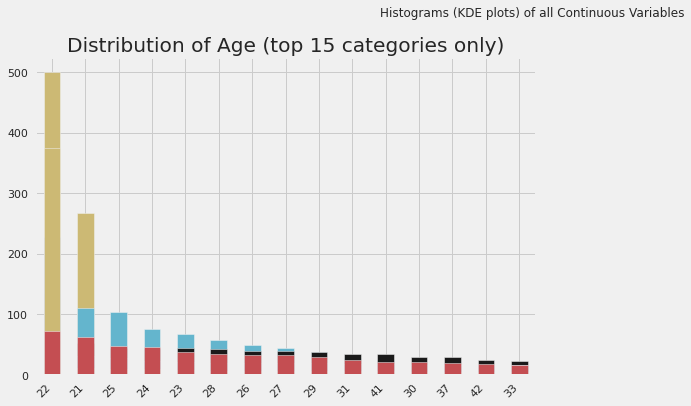

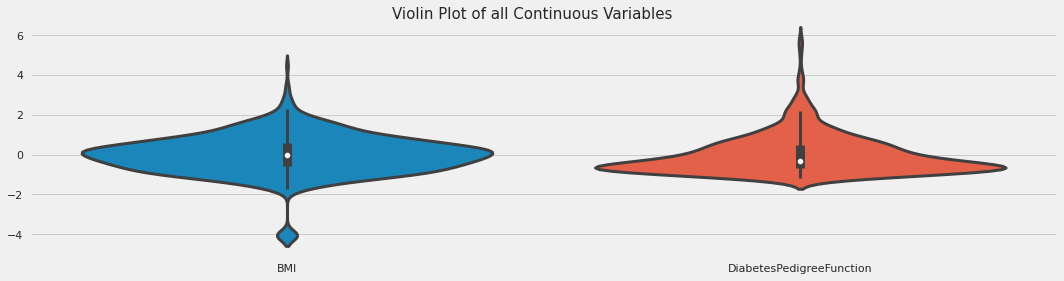

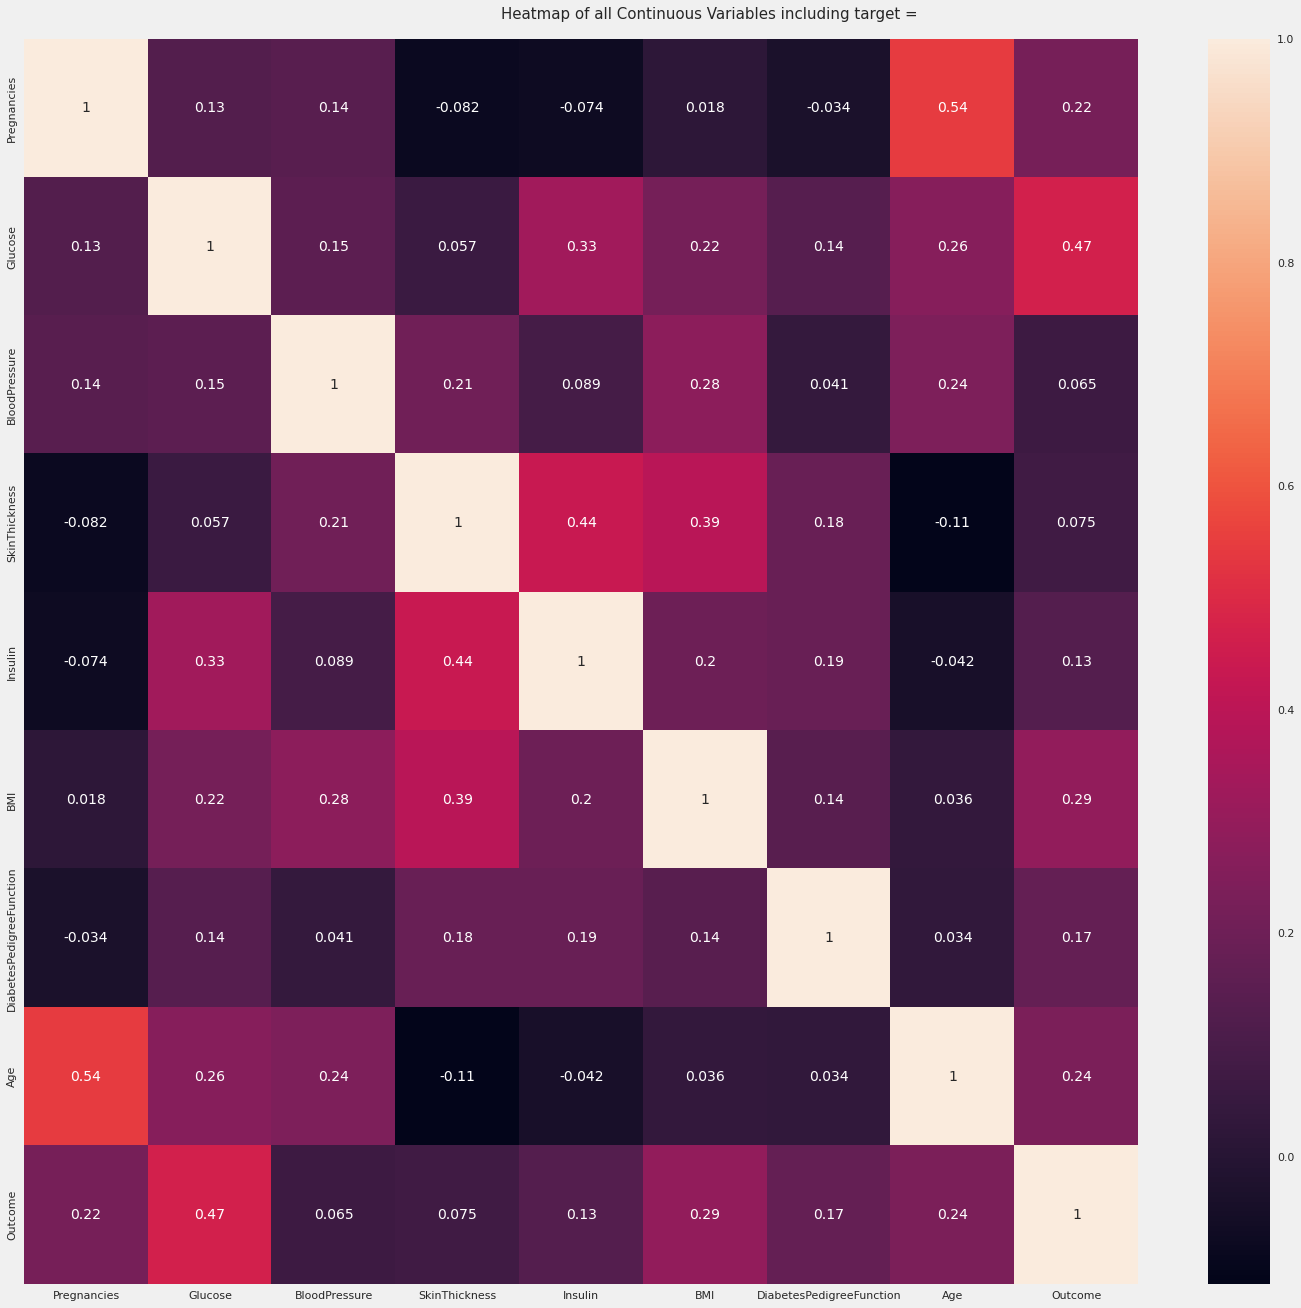

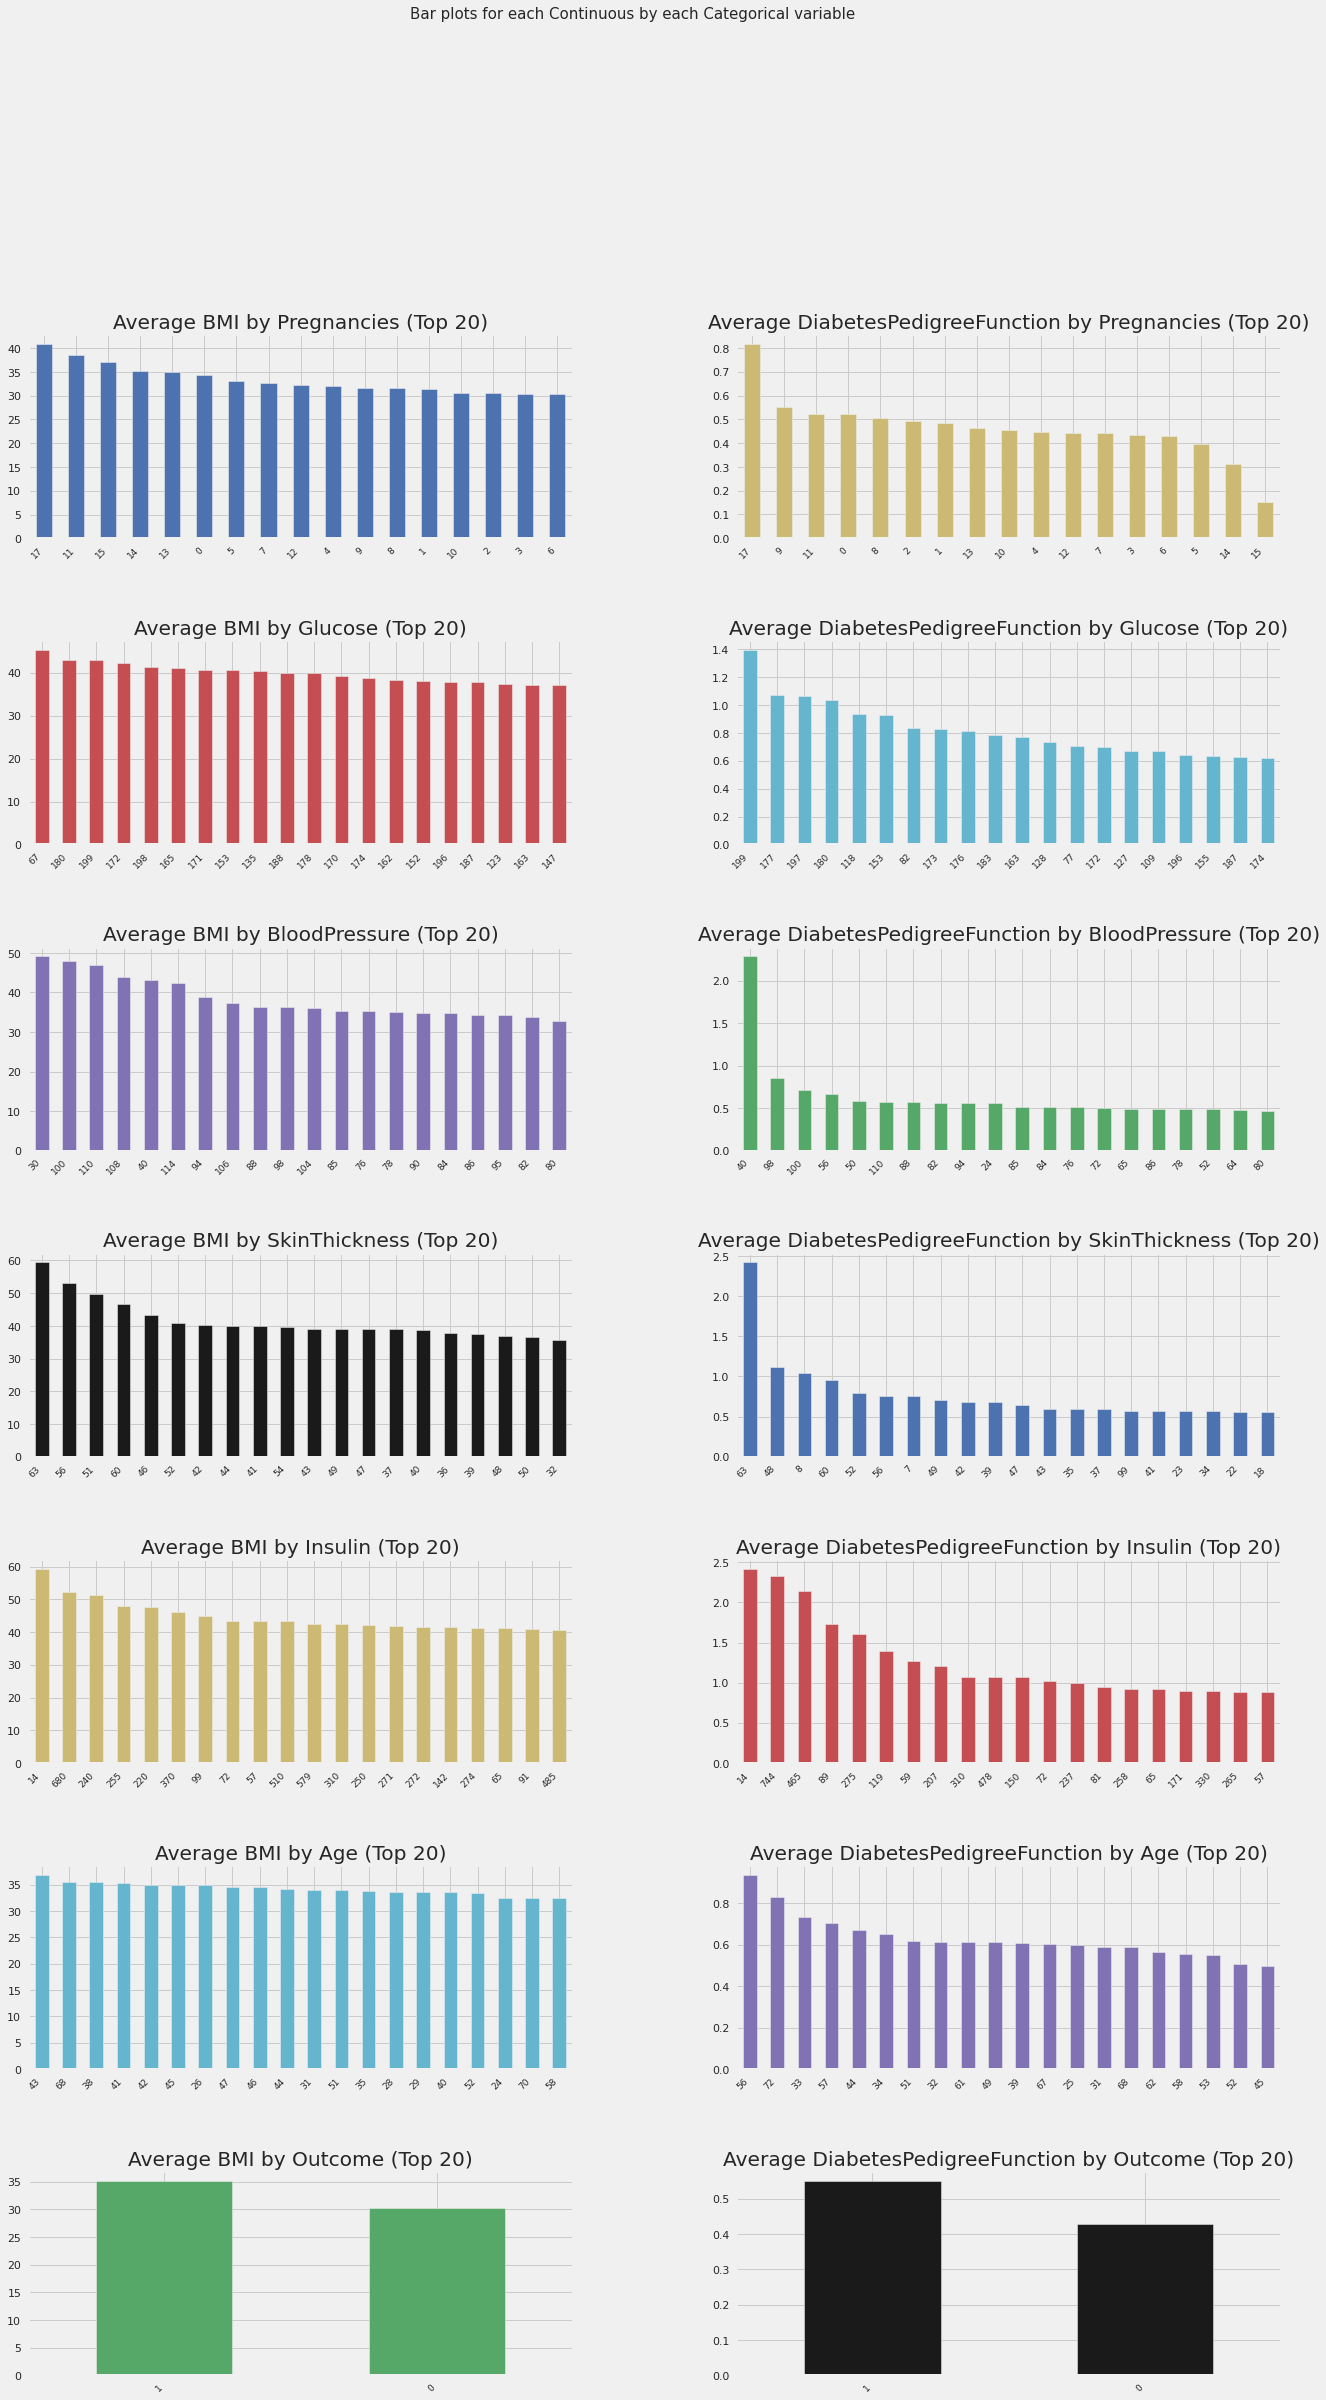

In [174]:
MyDataSet = AV.AutoViz('diabetes.csv')

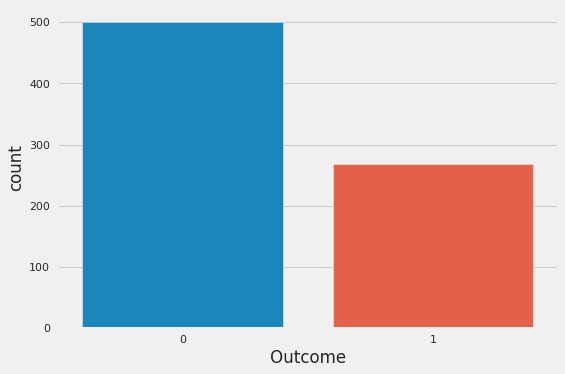

In [205]:
import seaborn as sns
sns.countplot(MyDataSet['Outcome'],label="Count")

In [206]:
MyDataSet.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [207]:
MyDataSet.shape


(768, 9)

In [208]:
MyDataSet.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [209]:
MyDataSet.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Now it's time to recocnize missing values

In [210]:
features = MyDataSet.columns
columns = (MyDataSet[features] == 0).sum()
print(columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [211]:
import numpy as np

In [212]:
MyDataSet[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = MyDataSet[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [213]:
MyDataSet.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

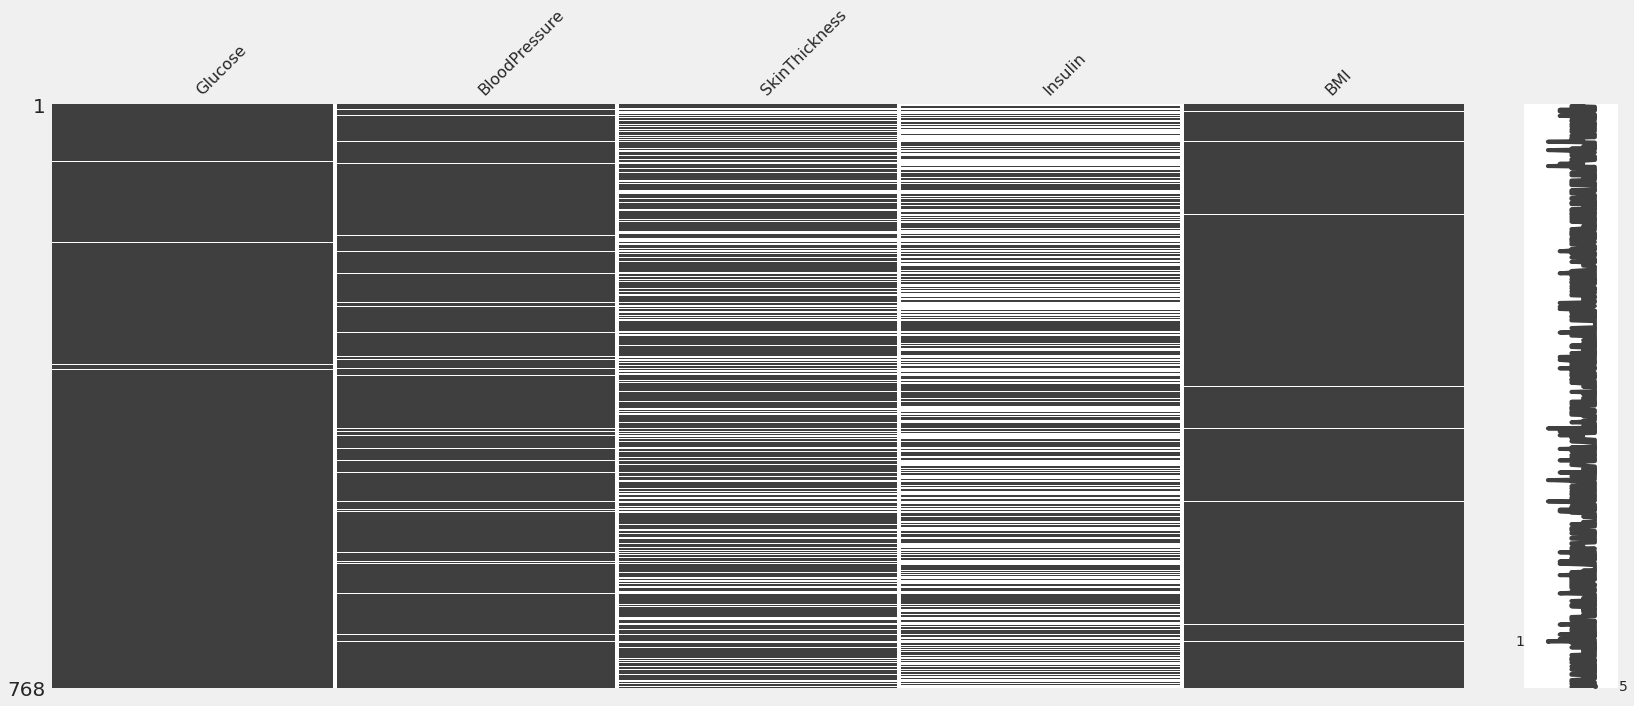

In [214]:
import missingno as msno
msno.matrix(MyDataSet[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])



In [215]:
MyDataSet['BloodPressure'].fillna(MyDataSet['BloodPressure'].median(), inplace =True)
MyDataSet['Glucose'].fillna(MyDataSet['Glucose'].median(), inplace =True)
MyDataSet['BMI'].fillna(MyDataSet['BMI'].median(), inplace =True)

In [216]:
by_Glucose_Age_Insulin_Grp = MyDataSet.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
MyDataSet['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)
MyDataSet['Insulin'] = MyDataSet['Insulin'].fillna(MyDataSet['Insulin'].mean())

In [217]:
by_BMI_Insulin = MyDataSet.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
MyDataSet['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)
MyDataSet['SkinThickness'].fillna(MyDataSet['SkinThickness'].mean(),inplace= True)

In [218]:
#check for being sure that missing vaues handeled or not
MyDataSet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Fortunately, our endeavour was effective**

In [219]:
import matplotlib.pyplot as plt

***Show the result after data cleaning and feature engineering:***




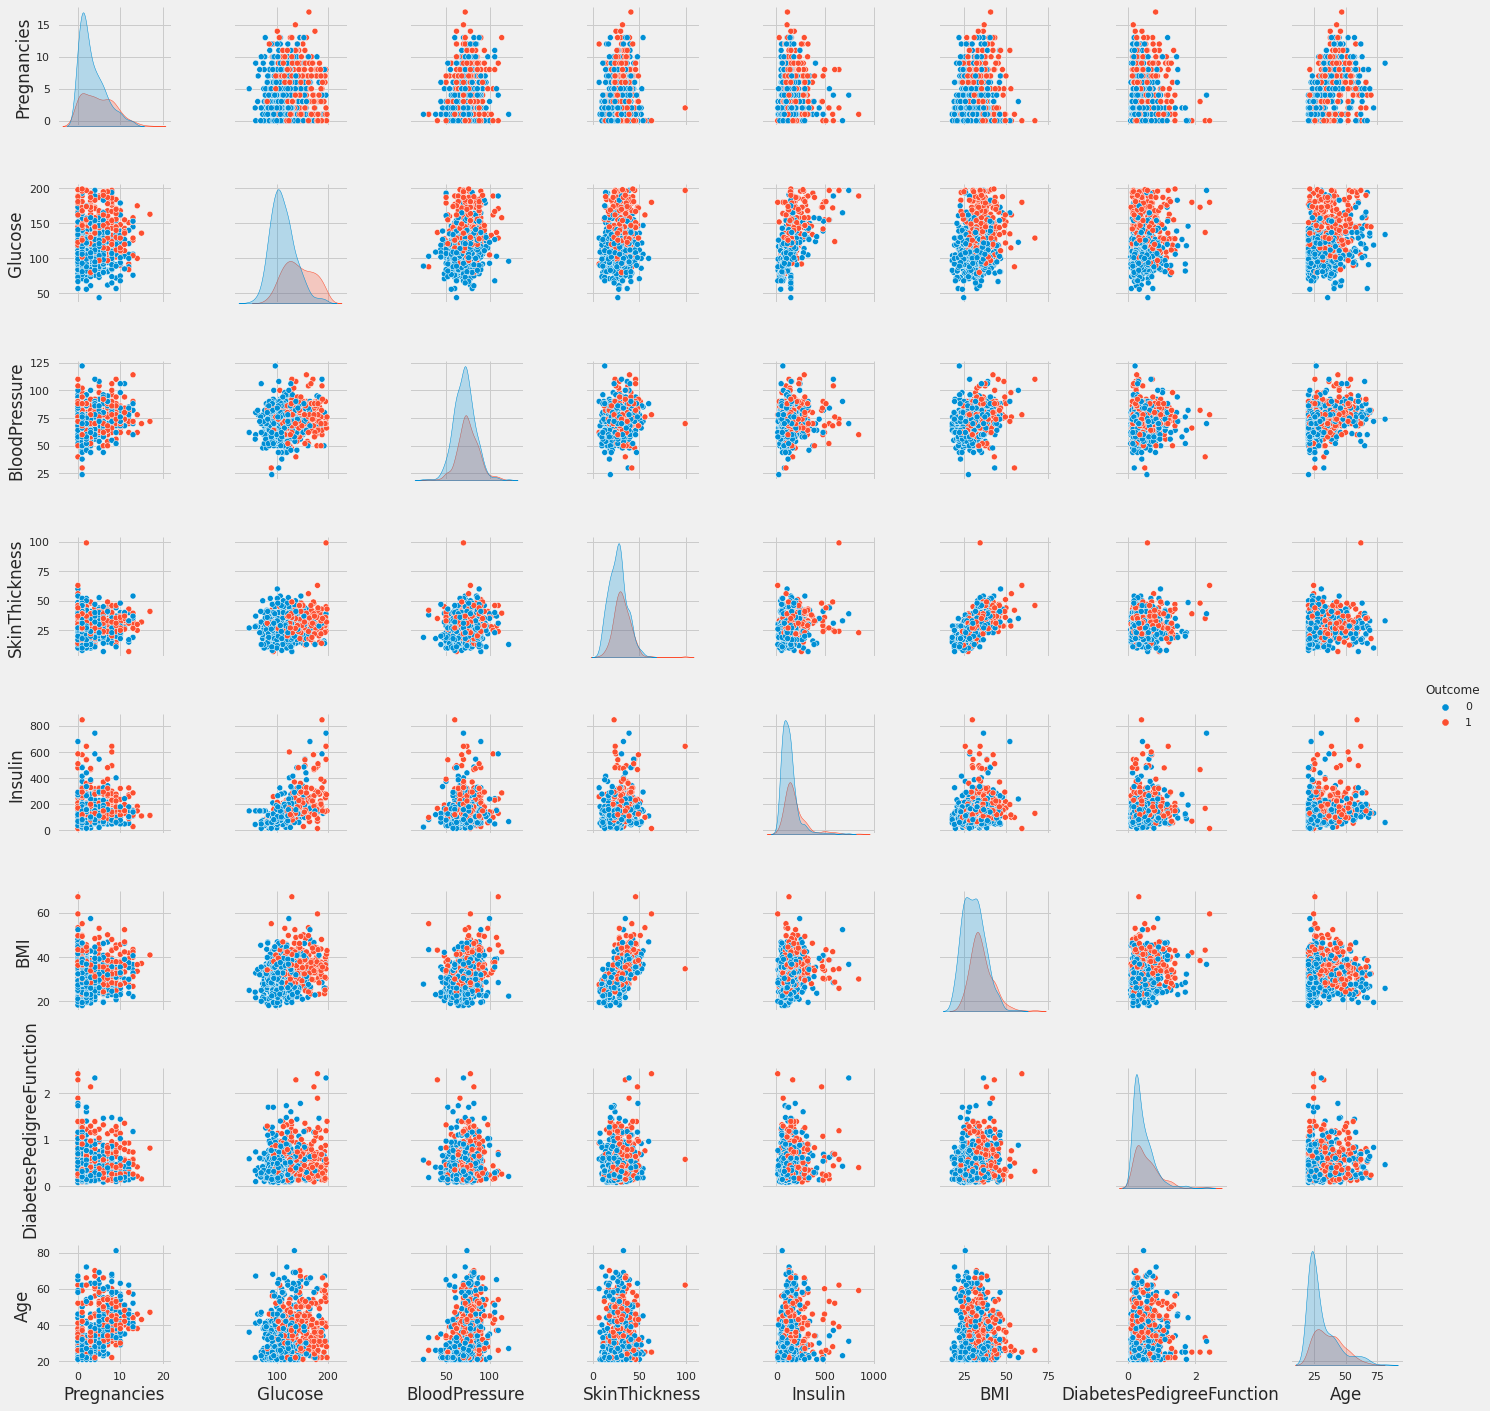

In [220]:
sns.pairplot(data=MyDataSet,hue='Outcome',diag_kind='kde')
plt.show()

**Now it's time to create train and test set.**

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MyDataSet.loc[:, MyDataSet.columns != 'Outcome'], 
                                                    MyDataSet['Outcome'], stratify=MyDataSet['Outcome'],test_size=.2 ,random_state=42)

In [232]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,recall_score,precision_score,auc

In [233]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train.ravel())
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of DecisionTree is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for DecisionTree is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for DecisionTree is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[71 29]
 [27 27]]

The accuracy of DecisionTree is :  63.63636363636363 %

Precision score for DecisionTree is : 48.214285714285715 %

Recall score for DecisionTree is : 50.0 %


In [234]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[83 17]
 [26 28]]

The accuracy of Logistic Regression is :  72.07792207792207 %

Precision score for Logistic Regression is : 62.22222222222222 %

Recall score for Logistic Regression is : 51.85185185185185 %


In [235]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for SVM is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[84 16]
 [30 24]]

The accuracy of SVM is :  70.12987012987013 %

Precision score for SVM is : 60.0 %

Recall score for SVM is : 44.44444444444444 %


In [236]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of RandomForest is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for RandomForest is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for RandomForest is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[82 18]
 [25 29]]

The accuracy of RandomForest is :  72.07792207792207 %

Precision score for RandomForest is : 61.702127659574465 %

Recall score for RandomForest is : 53.70370370370371 %


In [243]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)  
model.fit(X_train, y_train)
predicted = model.predict(X_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[79 21]
 [29 25]]

The accuracy of KNN is :  67.53246753246754 %

Precision score for KNN is : 54.347826086956516 %

Recall score for KNN is : 46.2962962962963 %


In [171]:
print("Conclusion:")

Conclusion:



**According to recall score and the number of FN,we figure out that the 
Decision Tree is the best alghorithm for this model.**

*Of course, we should note that changing some parameters such as test size and random state can affect the results to some extent.*


با توجه به نتایج بدست آمده از الگوریتم های متفاوت طبقه بندی بنظر می رسد که نتایج حاصل از الگوریتم درخت تصمیم با توجه به درصد ریکال و همینطور عدد اف ان الگوریتم مناسب تری برای این دیتاست باشد
البته باید توجه کنیم که تغییر برخی از پارامترهایی همچون تست سایز و رندوم استیت می تواند تا حدودی در نتایج حاصله تاـثیر بگذارد 

*It was my second experience in the world of* **data science** 

In [244]:
print("Thank you for your attention")

Thank you for your attention
